![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Metaheurísticas

## GRASP

### Professor: Felipe Reis


---
### Informações Iniciais

O presente tutorial tem como objetivo estudar o algoritmo GRASP (*Greedy Randomized Adaptive Search Procedures*).

#### Referências

O tutorial abaixo foi inspirado nas seguintes links:

* FESTA, P. and RESENTE, M. G. **Grasp: An Annotated Bibliography**. 2002. Essays and Surveys in Metaheuristics. Operations Research/Computer Science Interfaces Series, vol 15. Springer, Boston, MA. https://doi.org/10.1007/978-1-4615-1507-4_15

* LUKE, Sean. **Essentials of Metaheuristics (Second Edition).**. 2013. Lulu. Disponível em: https://cs.gmu.edu/~sean/book/metaheuristics/.

* LUZIA, L. F. and RODRIGUES, M. C. **Estudo sobre as metaheurísticas**. 2009. Disponível em: https://www.ime.usp.br/~gold/cursos/2009/mac5758/LeandroMauricioHeuristica.pdf.

* SOUZA, M. J. F. **Inteligência computacional para otimização**. 2011. Disponível em: http://www.decom.ufop.br/prof/marcone/Disciplinas/InteligenciaComputacional/InteligenciaComputacional.pdf

* BROWNLEE, Jason. **Stochastic Hill Climbing in Python from Scratch.**. 2020. Disponível em: https://machinelearningmastery.com/stochastic-hill-climbing-in-python-from-scratch/

* DE HANN, Hein. **How to Implement the Hill Climbing Algorithm in Python**. 2020. Disponível em: https://towardsdatascience.com/how-to-implement-the-hill-climbing-algorithm-in-python-1c65c29469de

### Importação de bibliotecas 

In [2]:
import numpy as np
import numpy.random as rd
import operator 
import matplotlib.pyplot as plt

import plot     #código plot.py (plota gráficos)

import asyncio
import multiprocessing

---
### Hill Climbing

Conforme indicado na aula teórica, o Hill Climbing pode ser utilizado como método de busca local, na fase de refinamento da solução, após a etapa de Construção.

In [3]:
def hill_climbing(f_objetivo, intervalo, iteracoes, step_size, op=operator.le, save=True):        
    all_values = []
    
    #gera um valor aletório como primeira solução
    best_value = rd.uniform(intervalo[0], intervalo[1])
    
    if(save):
        all_values.append(best_value)
    
    # run the hill climb
    for i in range(iteracoes):
        candidate = best_value + (rd.uniform(-1, 1) * step_size)
        
        # verifica se o ponto atual é melhor que o anterior 
        # a operação é passada como parâmetro, para permitir 
        # o hill-climbing descendente e ascendente 
        if(op(f_objetivo(candidate), f_objetivo(best_value))):
            best_value = candidate
            
        if(save):
            all_values.append(candidate)
            
    return best_value, f_objetivo(best_value), all_values

In [4]:
def hill_climbing_3d(f_objetivo, intervalo, iteracoes, step_size, op=operator.le, save=True):        
    all_values = []
    
    #gera um valor aletório como primeira solução
    best = [rd.uniform(intervalo[0], intervalo[1]), rd.uniform(intervalo[0], intervalo[1])]
    
    if(save):
        all_values.append(best)
    
    # run the hill climb
    for i in range(iteracoes):
        c1 = best[0] + (rd.uniform(-1, 1) * step_size)
        c2 = best[1] + (rd.uniform(-1, 1) * step_size)
        candidate = [c1, c2]
                
        # verifica se o ponto atual é melhor que o anterior 
        if(op(f_objetivo(candidate[0], candidate[1]), f_objetivo(best[0], best[1]))):
            best = candidate
            
        if(save):
            all_values.append(candidate)
            
    return best, f_objetivo(best[0], best[1]), all_values

### Estudo de Funções

Durante a aula de Hill Climbing, fizemos um estudo detalhado de algumas funções em 3 dimensões.

Algumas funções estão implementadas abaixo, para que possamos utilizar ela na implementação da GRASP. 

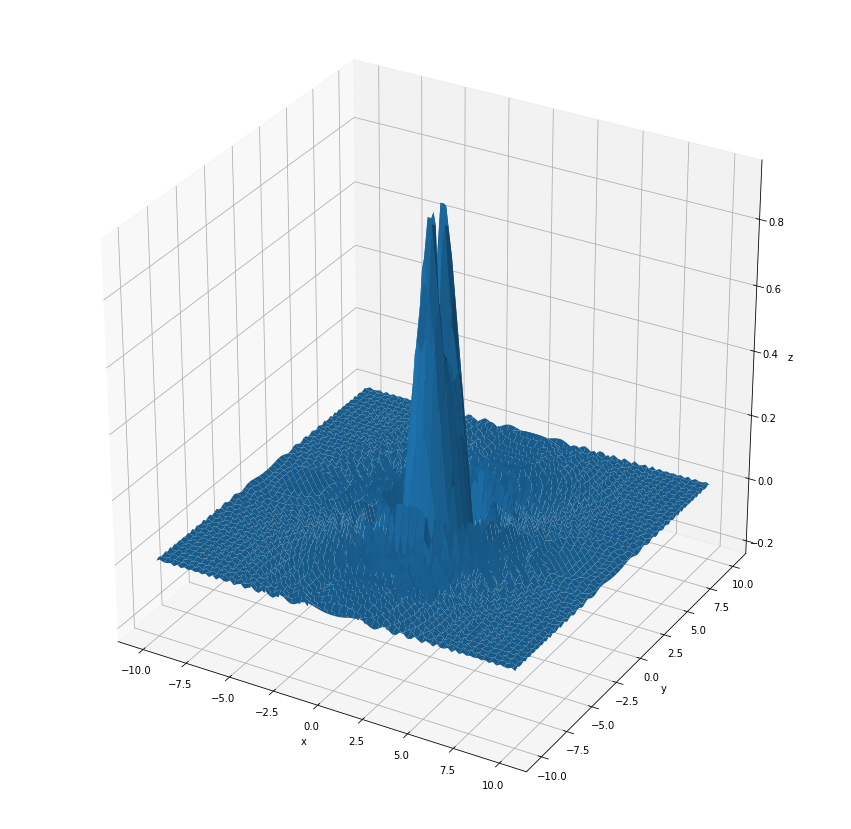

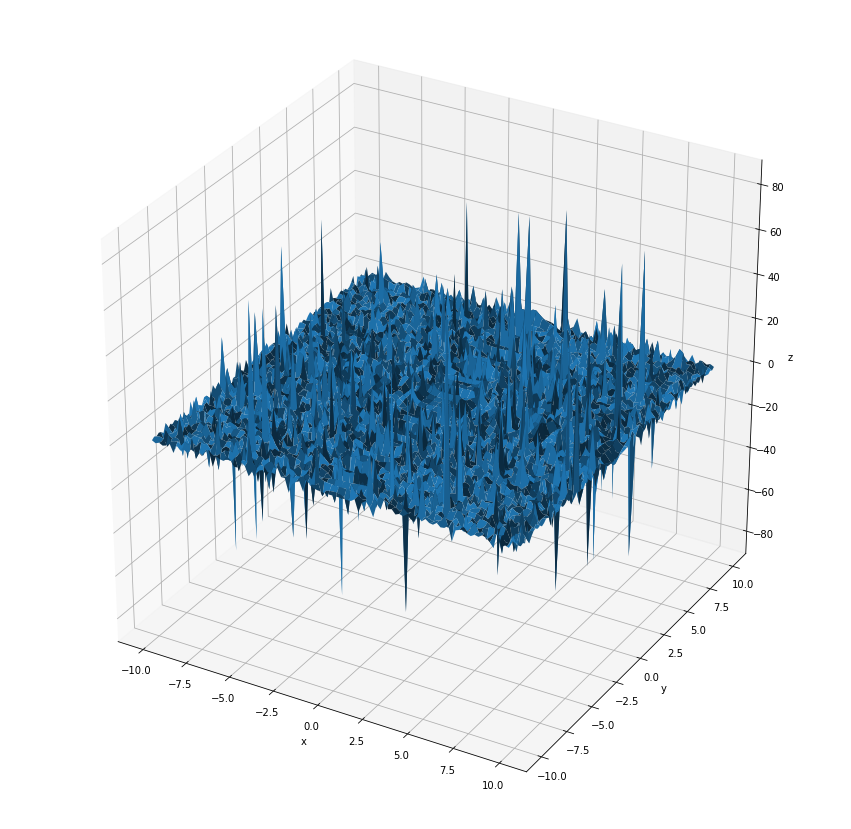

In [5]:
def f_prb5v1(x, y):
    return np.sin(np.power(x,2) + np.power(y,2)) / ((2*np.power(x,2)) + np.power(y,2))

def f_prb5v2(x, y):
    #return -np.sin((x**3) - (y**3)) / np.cos(x**2 + y**2)
    return -np.sin(np.power(x,3) - np.power(y,3)) / np.cos(np.power(x,2) + np.power(y,2))

plot.plot_3d(f_prb5v1, interval=10, type='surface')
plot.plot_3d(f_prb5v2, interval=10, type='surface')

---
### Algoritmo GRASP

In [6]:
def grasp(f_objetivo, intervalo, iteracoes=1000, step_size=0.1, vizinhos=10, op=operator.le, save=True):
    all_values = []
    
    #inicialização do método
    atual = [rd.uniform(intervalo[0], intervalo[1]), rd.uniform(intervalo[0], intervalo[1])]
    best = atual.copy()

    if(save):
        all_values.append(best)
    
    #execução do grasp
    for i in range(iteracoes):
        #fase construção
        atual = [rd.uniform(intervalo[0], intervalo[1]), rd.uniform(intervalo[0], intervalo[1])]
        
        #busca local (Hill Climbing)
        for j in range(vizinhos):
            c1 = atual[0] + (rd.uniform(-1, 1) * step_size)
            c2 = atual[1] + (rd.uniform(-1, 1) * step_size)
            candidato = [c1, c2]

            # verifica se o ponto atual é melhor que o anterior 
            if(op(f_objetivo(candidato[0], candidato[1]), f_objetivo(atual[0], atual[1]))):
                atual = candidato

        # verifica se o ponto atual é melhor que o melhor
        if(op(f_objetivo(atual[0], atual[1]), f_objetivo(best[0], best[1]))):            
            best = atual.copy()
            
        if(save):
            all_values.append(atual)
                        
    return best, f_objetivo(best[0], best[1]), all_values

---
## GRASP

### Problema 1: GRASP com função de 3 dimensões

O máximo de uma função de segundo grau será obtido pelo algoritmo de GRASP

Primeiramente vamos olhar o comportamento do Hill Climbing em uma função de 2 variáveis.

In [7]:
def imprimeMelhor(f_obj, result):
    best, score, values = result
    
    #imprime resultados
    print('Best: f(%s) = %f' % (best, score))
    
    #plota gráfico
    x = [i[0] for i in values]
    y = [i[1] for i in values]
    plot.plot_3d(f_obj, x=x, y=y, type='scatter')

Best: f([-0.04200850246931599, -0.2304647084063882]) = 0.968359


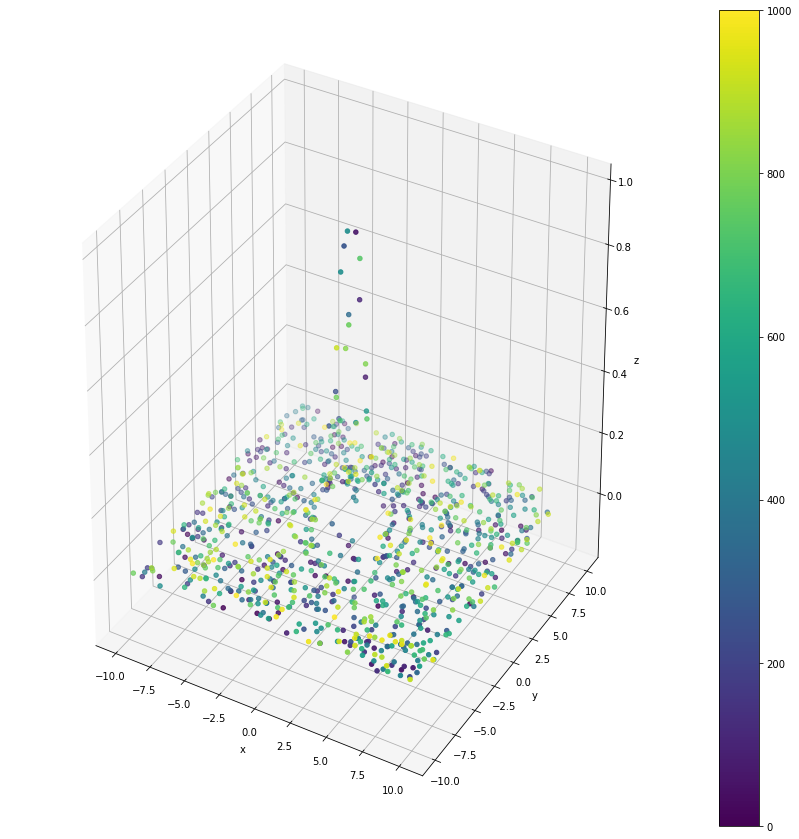

In [8]:
np.random.seed(5) #8
f_obj= f_prb5v1

result = grasp(f_objetivo=f_obj, intervalo=[-10, 10], iteracoes=1000, step_size=0.1, 
               vizinhos=10, op=operator.ge, save=True)

imprimeMelhor(f_obj, result)

Aumentando o número de vizinhos (10 $\to$ 20)

Best: f([5.845323641818882e-05, 0.2442189833078812]) = 0.999407


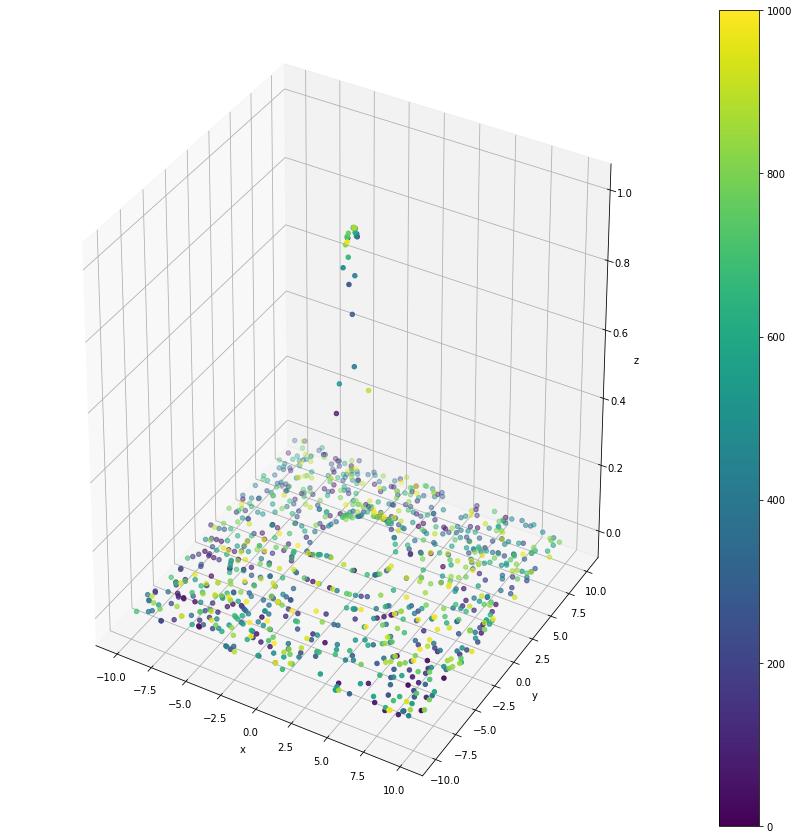

In [10]:
np.random.seed(5) #8
f_obj= f_prb5v1

result = grasp(f_objetivo=f_obj, intervalo=[-10, 10], iteracoes=1000, step_size=0.1, 
               vizinhos=20, op=operator.ge, save=True)

imprimeMelhor(f_obj, result)

Alterando a função objetivo.

Best: f([-7.585815718450933, -0.7580886952624689]) = 3383.204644


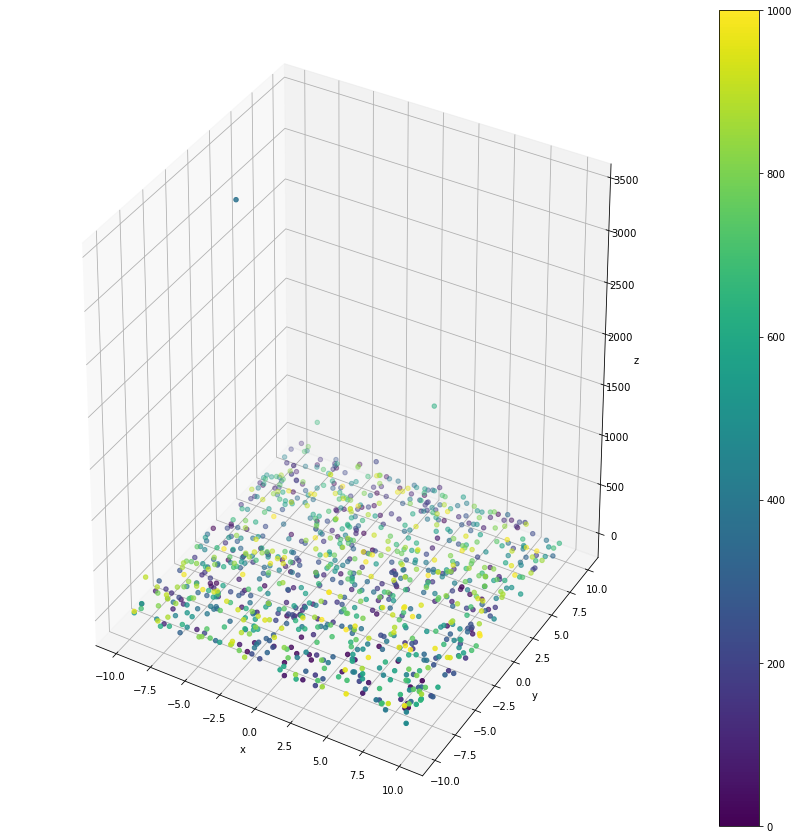

3383.2046436684527


In [11]:
np.random.seed(5) #8
f_obj= f_prb5v2

result = grasp(f_objetivo=f_obj, intervalo=[-10, 10], iteracoes=1000, step_size=0.1, 
               vizinhos=20, op=operator.ge, save=True)

imprimeMelhor(f_obj, result)

print(f_prb5v2(-7.585815718450933, -0.7580886952624689))

### Problema 2: GRASP Paralelo com função de 3 dimensões

#### Código Original 

Na versão abaixo, foi aumentado o número de iterações, para que possamos ver o comportamento do sistema.

Verifique a utilização de CPUs em seu monitor de sistemas.

In [13]:
#Como iterações=10^8, para que seja possível acompanhar o monitor de sistema, o código foi comentado
'''
np.random.seed(5) #8
f_obj= f_prb5v1

result = grasp(f_objetivo=f_obj, intervalo=[-10, 10], iteracoes=10**8, step_size=0.1, 
               vizinhos=20, op=operator.ge, save=True)

imprimeMelhor(f_obj, result)
'''

'\nnp.random.seed(5) #8\nf_obj= f_prb5v1\n\nresult = grasp(f_objetivo=f_obj, intervalo=[-10, 10], iteracoes=10**8, step_size=0.1, \n               vizinhos=20, op=operator.ge, save=True)\n\nimprimeMelhor(f_obj, result)\n'

#### Utilização de Threads

O código abaixo contém alguns rotinas para processamento paralelo usando threads.

In [20]:
def grasp_main():
    np.random.seed(5) #8
    f_obj= f_prb5v1
    it = 1000
    
    result = grasp(f_objetivo=f_obj, intervalo=[-10, 10], iteracoes=it, step_size=0.1, 
               vizinhos=20, op=operator.ge, save=True)
    
    imprimeMelhor(f_obj, result)

Best: f([0.003684255380502632, -0.30427362655971313]) = 0.998425
Best: f([0.003684255380502632, -0.30427362655971313]) = 0.998425


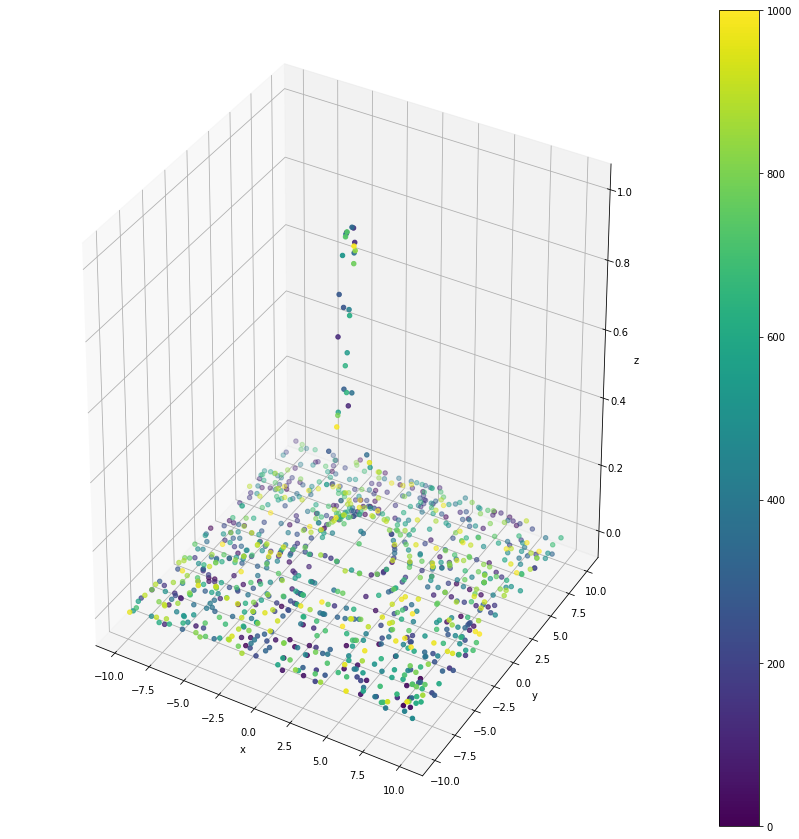

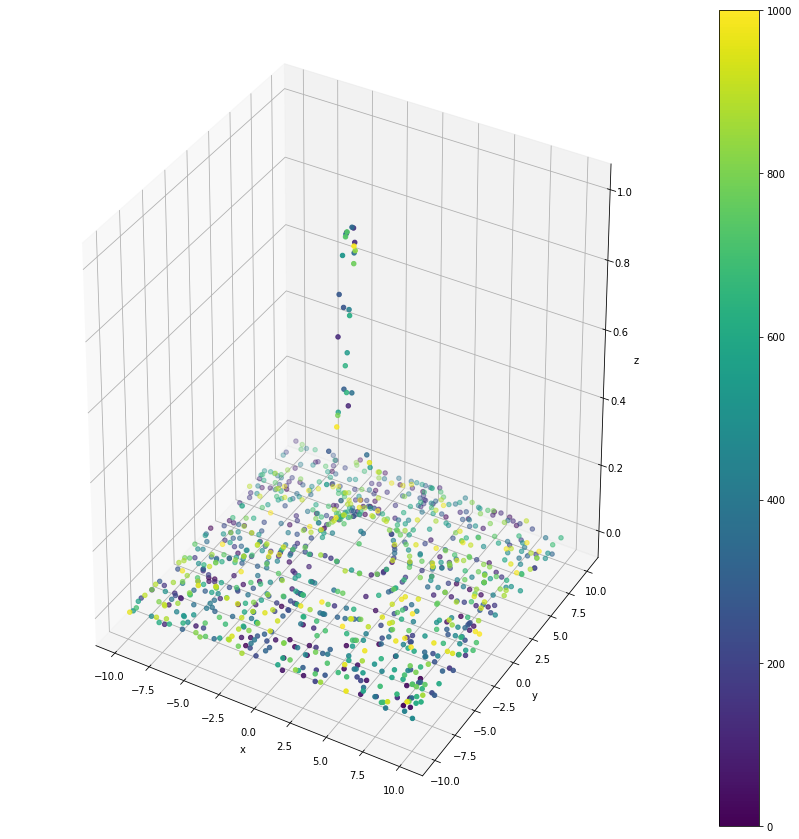

In [21]:
import multiprocessing

process = []
for _ in range(2):
    p = multiprocessing.Process(target=grasp_main)
    
    process.append(p)
    p.start()

#### Implementação GRASP Paralelo (Versão Naive)

A implementação paralela do GRASP foi feita da maneira mais ingênua / simples (naive) possível.

A vantagem dessa implementação é que não são necessárias modificações no código original, bastando processar o GRASP em threads diferentes.

In [ ]:
f_obj= f_prb5v1
rq = multiprocessing.Queue()

#função de execução em paralelo
def grasp_pool():
    #np.random.seed(5) #8
    it = 1000
    
    result = grasp(f_objetivo=f_obj, intervalo=[-10, 10], iteracoes=it, step_size=0.1, 
               vizinhos=20, op=operator.ge, save=True)
    
    rq.put(result)

#executa processos em paralelo
n_processos=8

processes = []
for _ in range(n_processos):
    p = multiprocessing.Process(target=grasp_pool)
    
    processes.append(p)
    p.start()

#recupera a fila de resultados dos processoss
r_processes = [rq.get() for p in processes] 
print('Quantidade resultados', len(r_processes))

#faz união de todos os resultados processados em paralelo e define melhor resultado
results = []
best, score = 0,0

for result in r_processes:
    best_i, score_i, values = result

    if(score_i > score):
        best = best_i
        score = score_i
    results.extend(values)

#imprime melhor resultado
resultado_final = best, score, results

imprimeMelhor(f_obj, resultado_final)